## 1) Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [36]:
#Cell 1: Import Libraries and Mount Drive
# Import necessary libraries for data manipulation, visualization, and machine learning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [37]:
#Cell 2: Load Training Data
# Load the training dataset
train_data = pd.read_csv('SalaryData_Train.csv')
# Display the first few rows of the training data
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#Cell 3: Load Testing Data
# Load the testing dataset
test_data = pd.read_csv('SalaryData_Test.csv')
# Display the first few rows of the testing data
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
#Cell 4: Check Data Types
# Check the data types of the features in the training dataset
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [8]:
#Cell 5: Check Data Types in Testing Data
# Check the data types of the features in the testing dataset
test_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [9]:
#Cell 6: Count Target Variable Values in Training Data
#Count the occurrences of each class in the target variable 'Salary' in the training dataset
train_data['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [10]:
#Cell 7: Count Target Variable Values in Testing Data
# Count the occurrences of each class in the target variable 'Salary' in the testing dataset
test_data['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [11]:
#Cell 8: Identify Categorical Variables
# Identify categorical variables in the training dataset
categorical_vars = [col for col in train_data.columns if train_data[col].dtype == 'O']
print(f'There are {len(categorical_vars)} categorical variables\n')
print('The categorical variables are:\n', categorical_vars)

There are 9 categorical variables

The categorical variables are:
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [12]:
#Cell 9: Count Unique Labels in Categorical Variables
# Count unique labels in each categorical variable
for var in categorical_vars:
  print(f"{var} contains {train_data[var].nunique()} unique labels...")

workclass contains 7 unique labels...
education contains 16 unique labels...
maritalstatus contains 7 unique labels...
occupation contains 14 unique labels...
relationship contains 6 unique labels...
race contains 5 unique labels...
sex contains 2 unique labels...
native contains 40 unique labels...
Salary contains 2 unique labels...


In [13]:
#Cell 10: Calculate Distribution of Categorical Variables
# Calculate and display the distribution of each categorical variable
for var in categorical_vars:
  print(train_data[var].value_counts() / len(train_data))

 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

In [14]:
#Cell 11: Identify Numerical Features
# Identify numerical features in the training dataset
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtype != 'O']
print(f'Number of numerical variables: {len(numerical_features)}')
# Display the first few rows of numerical features
train_data[numerical_features].head()

Number of numerical variables: 5


,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [15]:
#Cell 12: Identify Discrete and Continuous Features
# Identify discrete features (with fewer than 25 unique values)
discrete_features = [feature for feature in numerical_features if len(train_data[feature].unique()) < 25]
print(f'Discrete Variables Count: {len(discrete_features)}')

# Identify continuous features (remaining numerical features)
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print(f'Continuous Feature Count: {len(continuous_features)}')

Discrete Variables Count: 1
Continuous Feature Count: 4


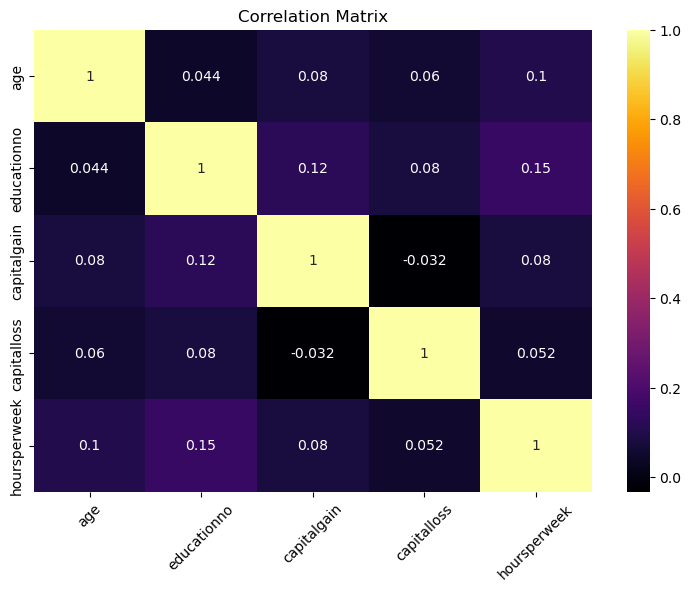

In [16]:
#Cell 13: Correlation Matrix
# Display the correlation matrix for numerical features
correlation_matrix = train_data.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()

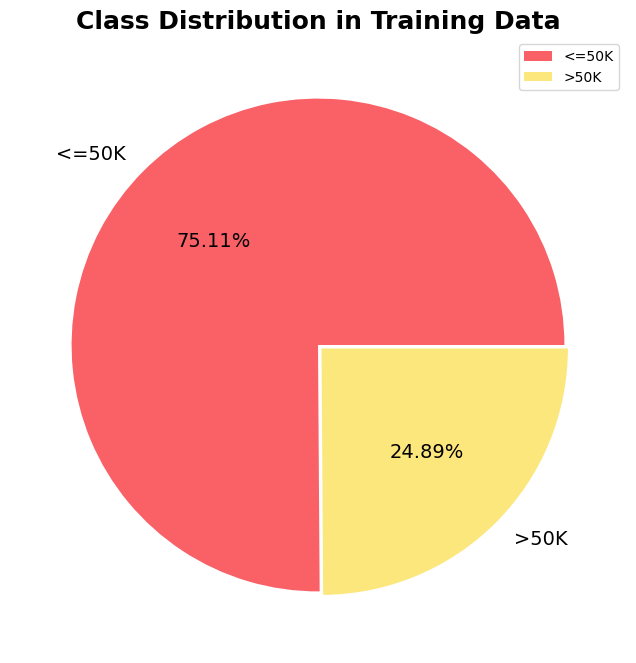

In [17]:
#Cell 14: Class Distribution in Training Data
# Visualize the distribution of the target variable in the training dataset
plt.figure(figsize=(8, 8))
plt.pie(train_data['Salary'].value_counts(), labels=['<=50K', '>50K'], autopct='%.2f%%',
      colors=["#F96167", "#FCE77D"], explode=[0, 0.02], textprops={'fontsize': 14})
plt.legend(loc='best')
plt.title("Class Distribution in Training Data", fontsize=18, fontweight='bold')
plt.show()

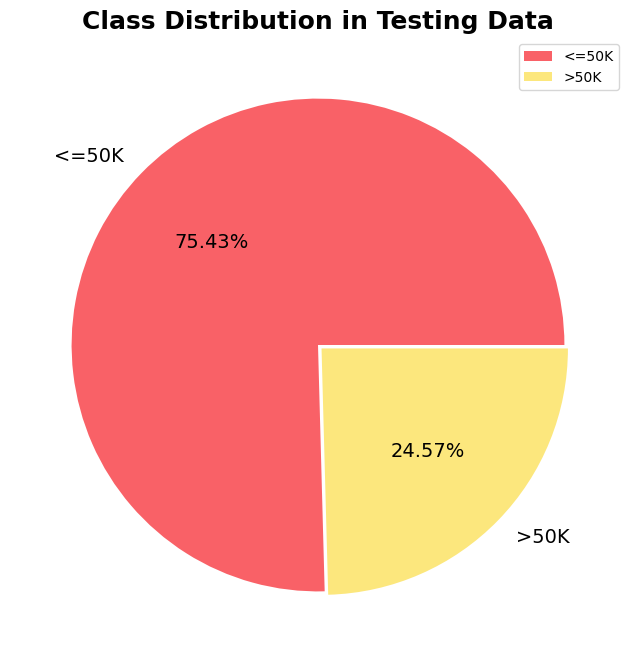

In [18]:
#Cell 15: Class Distribution in Testing Data
# Visualize the distribution of the target variable in the testing dataset
plt.figure(figsize=(8, 8))
plt.pie(test_data['Salary'].value_counts(), labels=['<=50K', '>50K'], autopct='%.2f%%',
      colors=["#F96167", "#FCE77D"], explode=[0, 0.02], textprops={'fontsize': 14})
plt.legend(loc='best')
plt.title("Class Distribution in Testing Data", fontsize=18, fontweight='bold')
plt.show()

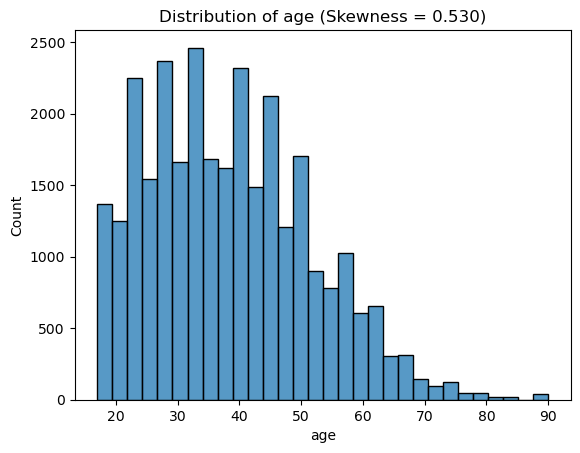

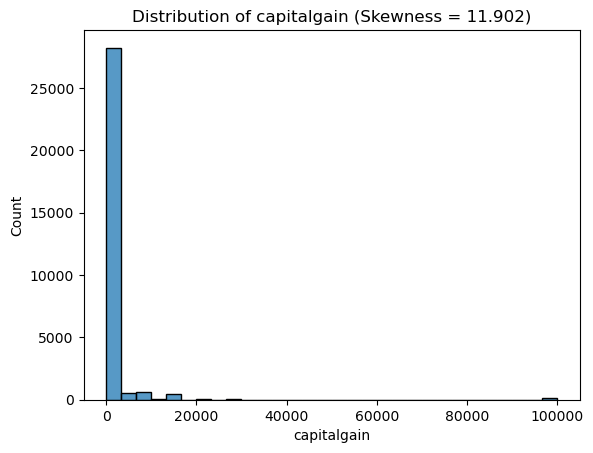

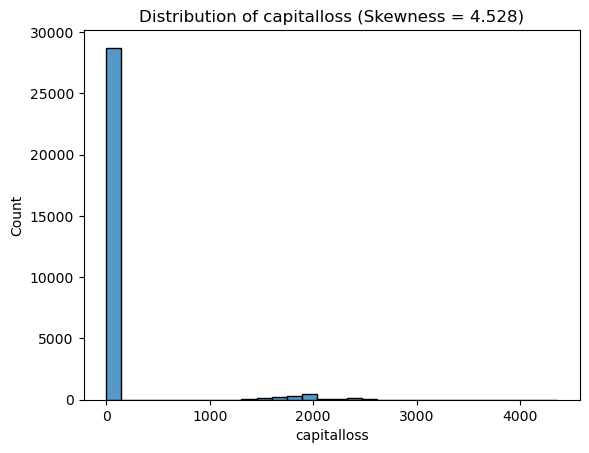

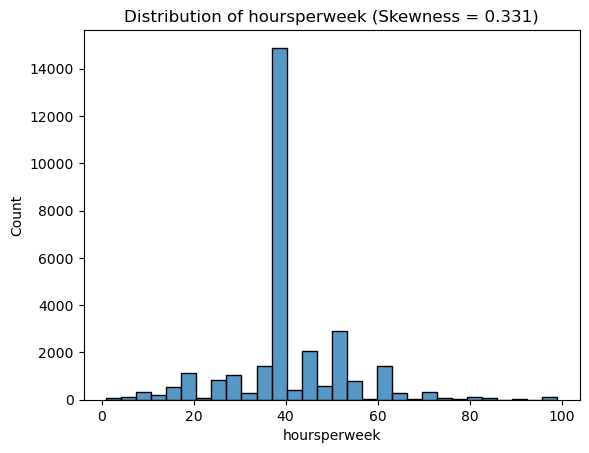

In [19]:
#Cell 16: Visualize Skewness of Continuous Features
# Visualize the distribution of continuous features and their skewness
for feature in continuous_features:
  skewness = train_data[feature].skew()
  sns.histplot(train_data[feature], kde=False, bins=30)
  plt.title(f'Distribution of {feature} (Skewness = {skewness:.3f})')
  plt.show()

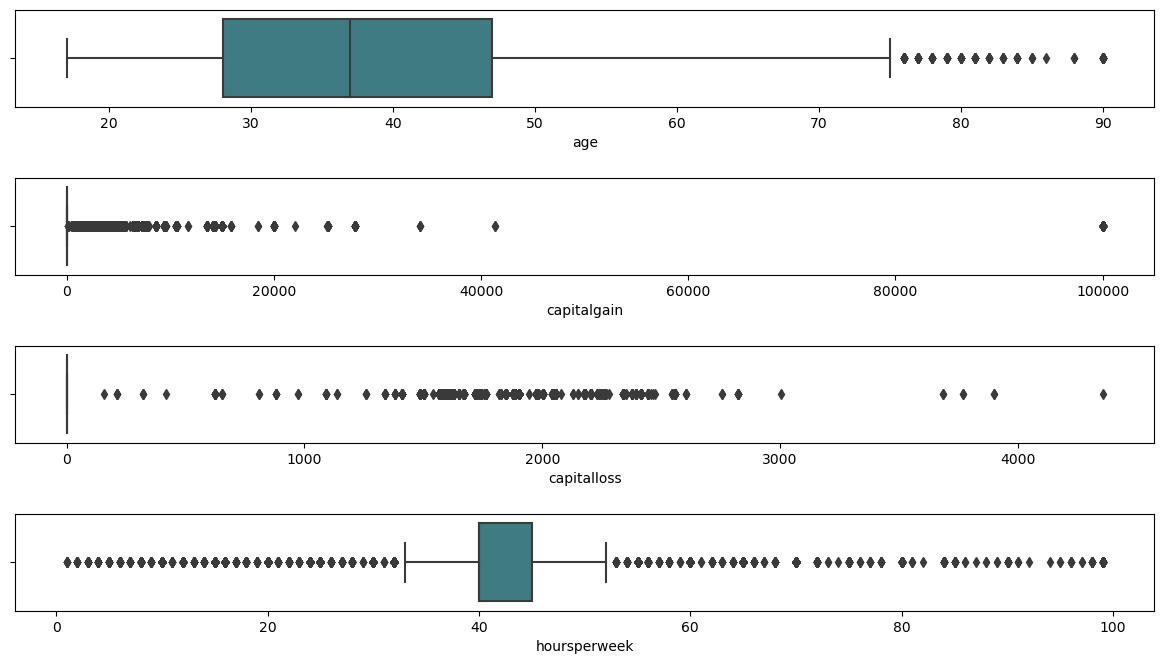

In [20]:
#Cell 17: Outlier Detection in Training Data
# Visualize potential outliers in continuous features using box plots
outlier_train = train_data.copy()
fig, axes = plt.subplots(4, 1, figsize=(12, 7), sharex=False, sharey=False)
sns.boxplot(x='age', data=outlier_train, palette='crest', ax=axes[0])
sns.boxplot(x='capitalgain', data=outlier_train, palette='crest', ax=axes[1])
sns.boxplot(x='capitalloss', data=outlier_train, palette='crest', ax=axes[2])
sns.boxplot(x='hoursperweek', data=outlier_train, palette='crest', ax=axes[3])
plt.tight_layout(pad=2.0)
plt.show()

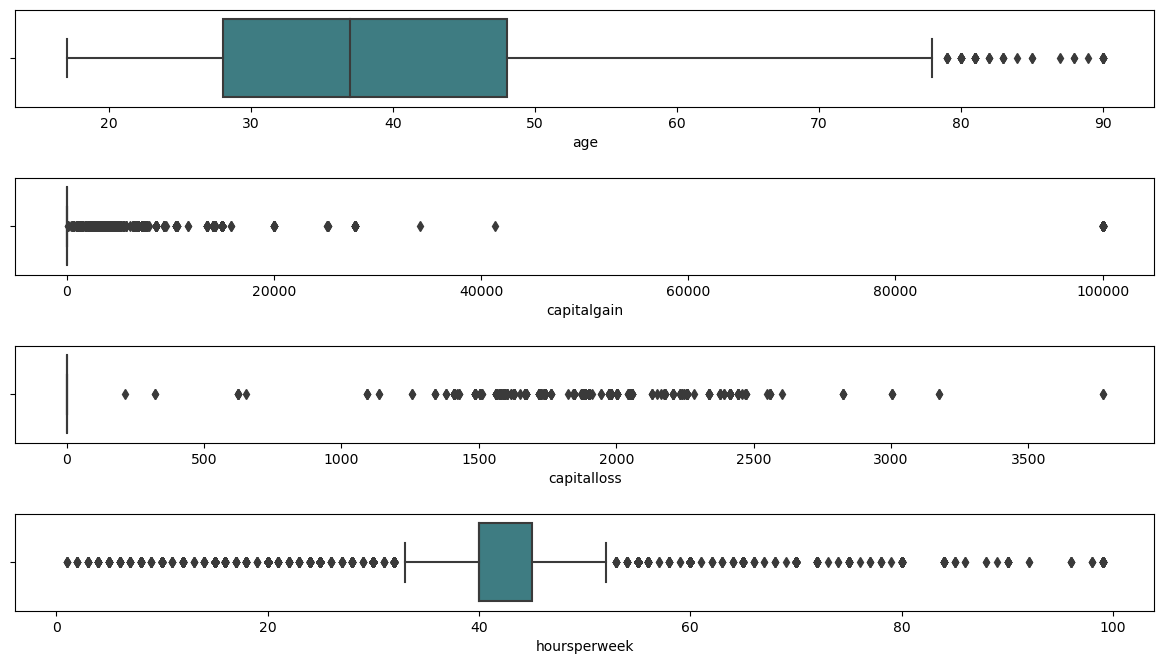

In [21]:
#Cell 18: Outlier Detection in Testing Data
# Visualize potential outliers in continuous features using box plots for testing data
outlier_test = test_data.copy()
fig, axes = plt.subplots(4, 1, figsize=(12, 7), sharex=False, sharey=False)
sns.boxplot(x='age', data=outlier_test, palette='crest', ax=axes[0])
sns.boxplot(x='capitalgain', data=outlier_test, palette='crest', ax=axes[1])
sns.boxplot(x='capitalloss', data=outlier_test, palette='crest', ax=axes[2])
sns.boxplot(x='hoursperweek', data=outlier_test, palette='crest', ax=axes[3])
plt.tight_layout(pad=2.0)
plt.show()

In [22]:
#Cell 19: Identify Categorical Features
# Identify categorical features in the training dataset
cat_features = [feature for feature in train_data.columns if train_data[feature].dtype == 'O']
print(f'Number of Categorical Features: {len(cat_features)}\n', cat_features)

Number of Categorical Features: 9
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


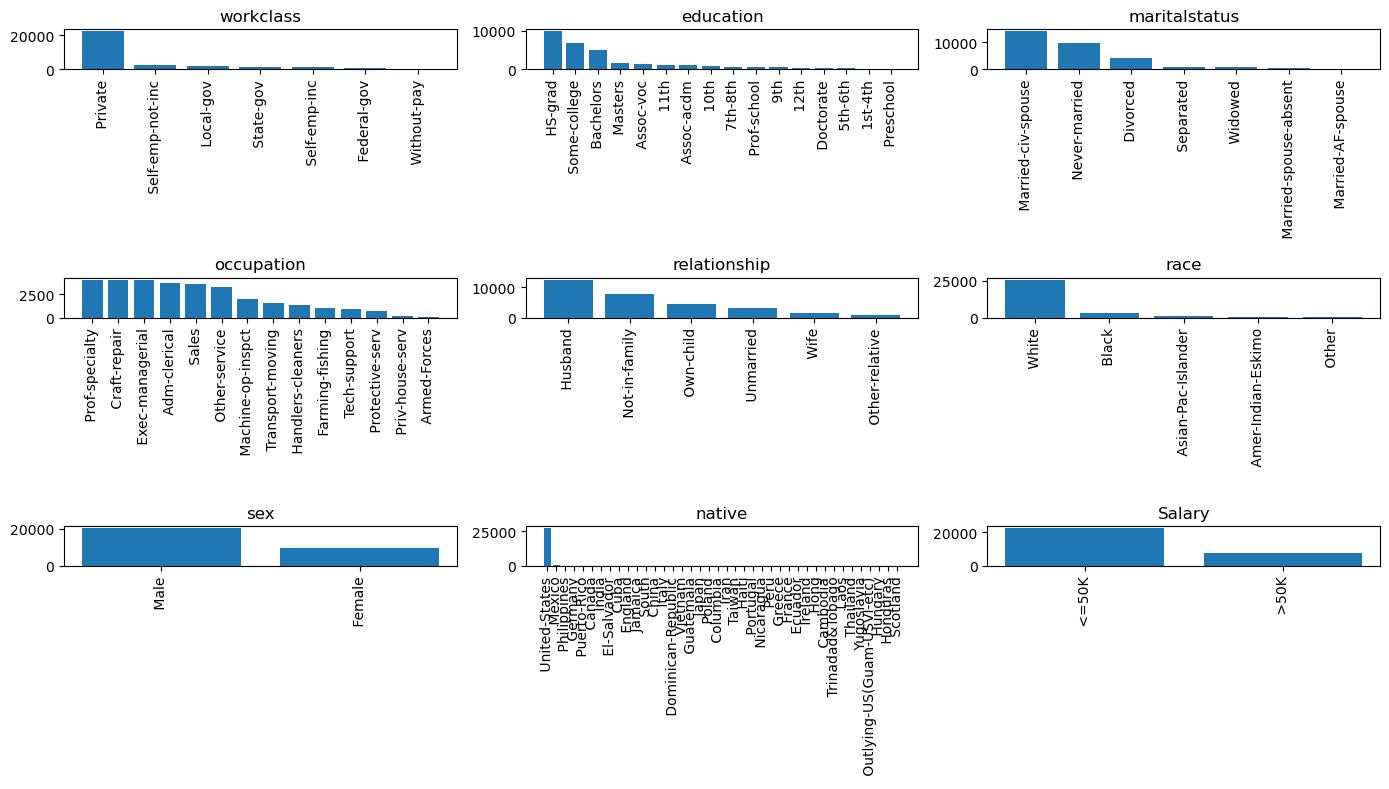

In [23]:
#Cell 20: Visualize Categorical Features
# Visualize the distribution of each categorical feature using bar plots
fig, axs = plt.subplots(3, 3, figsize=(14, 8))
counter = 0

for cat_col in cat_features:
  value_counts = train_data[cat_col].value_counts()
  x_pos = np.arange(len(value_counts))
  axs[counter // 3, counter % 3].bar(x_pos, value_counts.values, tick_label=value_counts.index)
  axs[counter // 3, counter % 3].set_title(cat_col)
  axs[counter // 3, counter % 3].tick_params(axis='x', rotation=90)
  counter += 1

plt.tight_layout()
plt.show()

In [24]:
#Cell 21: Encode Categorical Variables
# Initialize LabelEncoder for encoding categorical variables
label_encoder = LabelEncoder()

# Function to encode categorical variables
def encode_categorical(index):
  columns = train_data.columns
  train_data[columns[index]] = label_encoder.fit_transform(train_data[columns[index]])
  test_data[columns[index]] = label_encoder.transform(test_data[columns[index]])

# List of indices for categorical columns to encode
categorical_indices = [1, 2, 4, 5, 6, 7, 8, 12, 13]
for idx in categorical_indices:
  encode_categorical(idx)

In [25]:
#Cell 22: Prepare Features and Target Variables
# Prepare feature matrices and target vectors for training and testing datasets
X_train = train_data.drop('Salary', axis=1)
y_train = train_data['Salary']
X_test = test_data.drop('Salary', axis=1)
y_test = test_data['Salary']

# Display the shapes of the feature matrices and target vectors
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (30161, 13)
Shape of X_test: (15060, 13)
Shape of y_train: (30161,)
Shape of y_test: (15060,)


In [26]:
#Cell 23: Model Training and Evaluation Function
# Function to evaluate model performance on training and testing datasets
def evaluate_model(model, X_train, y_train, X_test, y_test, is_training=True):
  if is_training:
      predictions = model.predict(X_train)
      report = pd.DataFrame(classification_report(y_train, predictions, output_dict=True))
      print("Training Results:\n================================================")
      print(f"Accuracy Score: {accuracy_score(y_train, predictions) * 100:.2f}%")
      print("_______________________________________________")
      print(f"Classification Report:\n{report}")
      print("_______________________________________________")
      print(f"Confusion Matrix:\n{confusion_matrix(y_train, predictions)}\n")
  else:
      predictions = model.predict(X_test)
      report = pd.DataFrame(classification_report(y_test, predictions, output_dict=True))
      print("Testing Results:\n================================================")
      print(f"Accuracy Score: {accuracy_score(y_test, predictions) * 100:.2f}%")
      print("_______________________________________________")
      print(f"Classification Report:\n{report}")
      print("_______________________________________________")
      print(f"Confusion Matrix:\n{confusion_matrix(y_test, predictions)}\n")

In [27]:
#Cell 24: Train Gaussian Naive Bayes Model
# Train Gaussian Naive Bayes model
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train)

# Evaluate the Gaussian Naive Bayes model
evaluate_model(gaussian_model, X_train, y_train, X_test, y_test, is_training=True)
evaluate_model(gaussian_model, X_train, y_train, X_test, y_test, is_training=False)

Training Results:
Accuracy Score: 79.53%
_______________________________________________
Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.810592     0.683834  0.795332      0.747213      0.779038
recall         0.949322     0.330714  0.795332      0.640018      0.795332
f1-score       0.874489     0.445821  0.795332      0.660155      0.767780
support    22653.000000  7508.000000  0.795332  30161.000000  30161.000000
_______________________________________________
Confusion Matrix:
[[21505  1148]
 [ 5025  2483]]

Testing Results:
Accuracy Score: 79.47%
_______________________________________________
Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.812000     0.667956  0.794688      0.739978      0.776611
recall         0.947095     0.326757  0.794688      0.636926      0.794688
f1-score       0.874360     0.438838  0.794688      0.656599      0.767359
supp

In [28]:
#Cell 25: Train Multinomial Naive Bayes Model
# Train Multinomial Naive Bayes model
multinomial_model = MultinomialNB()
multinomial_model.fit(X_train, y_train)

# Evaluate the Multinomial Naive Bayes model
evaluate_model(multinomial_model, X_train, y_train, X_test, y_test, is_training=True)
evaluate_model(multinomial_model, X_train, y_train, X_test, y_test, is_training=False)

Training Results:
Accuracy Score: 77.29%
_______________________________________________
Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.785993     0.630186  0.772919      0.708090      0.747208
recall         0.958681     0.212440  0.772919      0.585561      0.772919
f1-score       0.863791     0.317761  0.772919      0.590776      0.727867
support    22653.000000  7508.000000  0.772919  30161.000000  30161.000000
_______________________________________________
Confusion Matrix:
[[21717   936]
 [ 5913  1595]]

Testing Results:
Accuracy Score: 77.50%
_______________________________________________
Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.788574     0.624500  0.774967      0.706537      0.748264
recall         0.958715     0.210811  0.774967      0.584763      0.774967
f1-score       0.865361     0.315215  0.774967      0.590288      0.730199
supp

In [29]:
#Cell 26: Train Categorical Naive Bayes Model
# Train Categorical Naive Bayes model
categorical_model = CategoricalNB()
categorical_model.fit(X_train, y_train)

# Evaluate the Categorical Naive Bayes model
evaluate_model(categorical_model, X_train, y_train, X_test, y_test, is_training=True)
evaluate_model(categorical_model, X_train, y_train, X_test, y_test, is_training=False)

Training Results:
Accuracy Score: 85.71%
_______________________________________________
Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.890959     0.738585    0.8571      0.814772      0.853028
recall         0.922659     0.659297    0.8571      0.790978      0.857100
f1-score       0.906532     0.696692    0.8571      0.801612      0.854296
support    22653.000000  7508.000000    0.8571  30161.000000  30161.000000
_______________________________________________
Confusion Matrix:
[[20901  1752]
 [ 2558  4950]]

Testing Results:
Accuracy Score: 85.66%
_______________________________________________
Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.891565     0.732709   0.85664      0.812137      0.852537
recall         0.922095     0.655676   0.85664      0.788885      0.856640
f1-score       0.906573     0.692055   0.85664      0.799314      0.853870
supp

In [30]:
#Cell 27: Model Validation
# Validate the performance of each model on the test set
y_pred_gaussian = gaussian_model.predict(X_test)
y_pred_multinomial = multinomial_model.predict(X_test)
y_pred_categorical = categorical_model.predict(X_test)

# Print accuracy scores for each model
print('GaussianNB Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gaussian)))
print('MultinomialNB Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_multinomial)))
print('CategoricalNB Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_categorical)))

GaussianNB Model accuracy score: 0.7947
MultinomialNB Model accuracy score: 0.7750
CategoricalNB Model accuracy score: 0.8566


In [31]:
#Cell 28: Classification Reports
# Print classification reports for each model
print('GaussianNB Model Classification Report:\n', classification_report(y_test, y_pred_gaussian))
print('MultinomialNB Model Classification Report:\n', classification_report(y_test, y_pred_multinomial))
print('CategoricalNB Model Classification Report:\n', classification_report(y_test, y_pred_categorical))

GaussianNB Model Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060

MultinomialNB Model Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060

CategoricalNB Model Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91     11360
           1       0.73      0.66      0.69      3700

    accuracy                           0.86     15060

In [32]:
#Cell 29: Check for Overfitting
# Check for overfitting by comparing training and testing scores
print('Training set score for CategoricalNB: {:.2f}%'.format(categorical_model.score(X_train, y_train) * 100))
print('Test set score for CategoricalNB: {:.2f}%'.format(categorical_model.score(X_test, y_test) * 100))

Training set score for CategoricalNB: 85.71%
Test set score for CategoricalNB: 85.66%


In [33]:
#Cell 30: Confusion Matrix
# Generate and display the confusion matrix for the Categorical Naive Bayes model
y_pred_final = categorical_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred_final)
print("Confusion Matrix:\n", confusion_mat)

Confusion Matrix:
 [[10475   885]
 [ 1274  2426]]


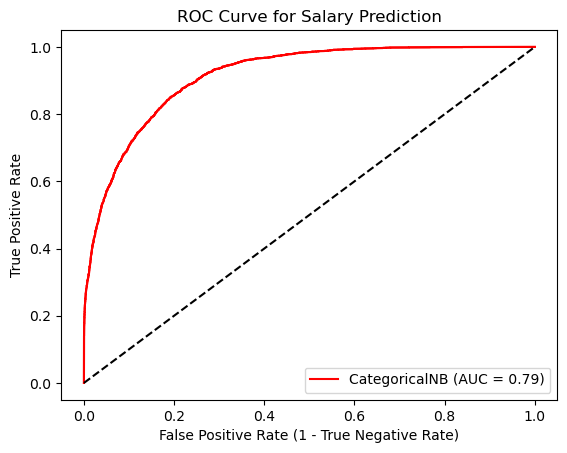

ROC-AUC Score: 0.7888853730491054


In [34]:
#Cell 31: ROC Curve and AUC
# Plot the ROC curve and calculate the AUC score for the Categorical Naive Bayes model
fpr, tpr, thresholds = roc_curve(y_test, categorical_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='red')
auc_score = roc_auc_score(y_test, y_pred_categorical)

plt.plot(fpr, tpr, color='red', label='CategoricalNB (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for Salary Prediction')
plt.xlabel('False Positive Rate (1 - True Negative Rate)')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('ROC-AUC Score:', auc_score)

# Conclusion

- **Gaussian Naive Bayes**: 
  - Training Accuracy: 79.53%
  - Testing Accuracy: 79.46%

- **Multinomial Naive Bayes**: 
  - Training Accuracy: 77.29%
  - Testing Accuracy: 77.50%

- **Categorical Naive Bayes**: 
  - Training Accuracy: 85.71%
  - Testing Accuracy: 85.66%

The Categorical Naive Bayes algorithm achieved the highest accuracy among the models tested.